## Метод опорных векторов в sklearn

**Задание 1.** Отобразите на графике данные задач `task1` и `task2`. Каждому классу определите свой цвет. Какое ядро необходимо выбрать для данных задач?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data1=pd.read_csv('task1.csv',names=['x','y','class'])
data1

,x,y,class
0,0.057833,-1.398096,-1
1,0.236386,0.283487,-1
2,-0.819391,0.809699,1
3,1.491693,-1.704607,-1
4,-0.567840,-0.071000,1
5,-0.694414,-0.992279,1
6,0.293799,0.660239,-1
7,-0.813164,1.480960,1
8,-1.503199,0.811566,1
9,0.637056,0.303951,-1


In [3]:
data2=pd.read_csv('task2.csv',names=['x','y','class'])
data2

,x,y,class
0,9.349913,-0.173044,1
1,-9.489691,-3.736932,1
2,-0.773686,-0.334750,-1
3,7.537869,3.060028,1
4,0.604132,-6.878277,1
...,...,...,...
80,8.415224,-0.343585,1
81,-7.551491,2.279189,1
82,3.087023,6.459161,-1
83,-8.701434,1.012202,1


<AxesSubplot:xlabel='x', ylabel='y'>

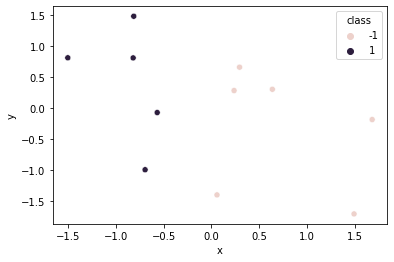

In [4]:
sns.scatterplot(data=data1,x='x',y='y',hue='class')

<AxesSubplot:xlabel='x', ylabel='y'>

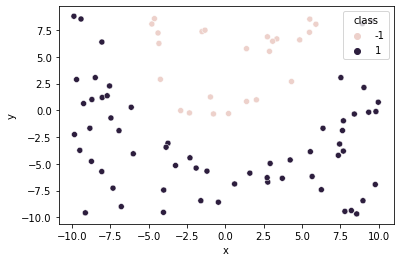

In [5]:
sns.scatterplot(data=data2,x='x',y='y',hue='class')

Для певого набора данных скорее подойдет линейное ядро, а для второго полиномиальное.

**Задание 2.** Обучите SVM из sklearn (`sklearn.svm.SVC`) с выбранными функциями ядра. Какие объекты оказались опорными? (методы `support_` и `support_vectors_` после применения метода `fit`)

In [6]:
from sklearn import svm
X1=data1[['x','y']].values
y1=data1['class'].values
clf1 = svm.SVC(kernel='linear')
clf1.fit(X1, y1)

SVC(kernel='linear')

In [7]:
clf1.support_vectors_ # get support vectors

array([[ 0.05783333, -1.39809578],
       [ 0.23638569,  0.28348681],
       [ 0.29379903,  0.66023859],
       [-0.81939127,  0.80969886],
       [-0.56784047, -0.07100018],
       [-0.69441368, -0.99227863]])

In [8]:
clf1.support_ # get indices of support vectors

array([0, 1, 6, 2, 4, 5])

In [9]:
from sklearn import svm
X2=data2[['x','y']].values
y2=data2['class'].values
clf2 = svm.SVC(kernel='poly')
clf2.fit(X2, y2)

SVC(kernel='poly')

In [10]:
clf2.support_vectors_ # get support vectors

array([[-0.77368594, -0.33474987],
       [ 2.87905415,  5.51449462],
       [-4.23488395,  2.89957896],
       [ 2.02769788,  0.98259327],
       [ 0.21069158, -0.29980541],
       [-0.96995935,  1.24946368],
       [-2.91017433, -0.02225634],
       [-2.3384616 , -0.24062757],
       [-1.52021973,  7.36480077],
       [-1.325815  ,  7.49112035],
       [ 1.38520962,  0.8313004 ],
       [-4.38820335,  7.23058663],
       [ 4.31556286,  2.69393642],
       [ 3.35833497,  6.67747427],
       [ 2.74602495,  6.8728388 ],
       [ 1.38023495,  5.76400991],
       [-4.79086668,  8.06866448],
       [ 5.48771328,  7.29468577],
       [ 4.84985646,  6.58442107],
       [-4.32926812,  6.25153674],
       [ 3.08702272,  6.45916093],
       [ 9.3499125 , -0.17304369],
       [-9.48969136, -3.73693212],
       [ 7.53786946,  3.06002849],
       [-9.24225798,  0.63469266],
       [-6.13653268,  0.28747428],
       [ 9.52254432,  8.34221068],
       [-7.45997418, -0.71132322],
       [-9.83840035,

In [11]:
clf2.support_ # get indices of support vectors

array([ 2,  9, 12, 18, 20, 25, 28, 36, 39, 48, 50, 51, 54, 63, 64, 69, 72,
       74, 75, 76, 82,  0,  1,  3,  5,  6, 10, 15, 27, 29, 31, 34, 40, 41,
       42, 46, 53, 57, 65, 67, 71, 79, 80, 84])

In [12]:
clf1.coef_

array([[-1.78561566,  0.08209551]])

**Задание 3.** Отобразите на графике полученную разделяющую гиперплоскость (методы `coef_` и `intercept_` после применения `fit`).

In [13]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)
    sns.scatterplot(data=data1,x='x',y='y',hue='class')

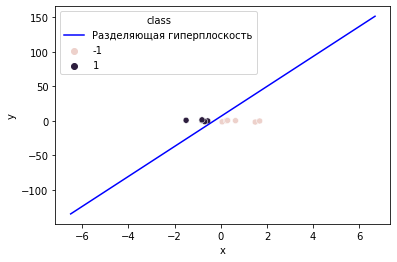

In [14]:
plot_hyperplane(clf1, np.min(X1[:, 0]), np.max(X1[:, 0]), 'blue', "Разделяющая гиперплоскость")

**Задание 4.** В задаче `task2` проведите сравнение на графике различных функций ядра. (`kernel`: 'linear', 'poly', 'rbf', 'sigmoid', для полиномиального ядра 'poly' рассмотрите различные степени полинома `degree`).

In [15]:
from sklearn import metrics

In [16]:
clf2_Lin = svm.SVC(kernel='linear')
clf2_Lin.fit(X2, y2)
metrics.accuracy_score(clf2_Lin.predict(X2), y2)

0.8235294117647058

In [17]:
clf2_poly = svm.SVC(kernel='poly',degree=3)
clf2_poly.fit(X2, y2)
metrics.accuracy_score(clf2_poly.predict(X2), y2)

0.8352941176470589

In [18]:
clf2_poly = svm.SVC(kernel='poly',degree=2)
clf2_poly.fit(X2, y2)
metrics.accuracy_score(clf2_poly.predict(X2), y2)

0.788235294117647

In [19]:
clf2_poly = svm.SVC(kernel='poly',degree=4)
clf2_poly.fit(X2, y2)
metrics.accuracy_score(clf2_poly.predict(X2), y2)

0.7176470588235294

In [20]:
clf2_rbf = svm.SVC(kernel='rbf')
clf2_rbf.fit(X2, y2)
metrics.accuracy_score(clf2_rbf.predict(X2), y2)

1.0

In [21]:
clf2_sigmoid = svm.SVC(kernel='sigmoid')
clf2_sigmoid.fit(X2, y2)
metrics.accuracy_score(clf2_sigmoid.predict(X2), y2)

0.8

Лучше всего себя показал 'rbf'

**Задание 5.** Решите методов опорных векторов задачу `multiclass_classification` и отобразите результат на графике.

In [22]:
data3 = pd.read_csv('multiclass_classification.csv')
data3

,X1,X2,y
0,0.827082,0.657831,3
1,0.050806,0.478433,2
2,0.444427,0.805732,3
3,0.952284,0.668506,3
4,0.406597,0.445482,2
...,...,...,...
995,0.355891,0.568789,3
996,0.863360,0.312122,1
997,0.654715,0.758457,3
998,0.533368,0.927485,3


<AxesSubplot:xlabel='X1', ylabel='X2'>

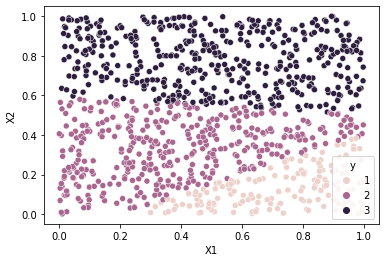

In [23]:
sns.scatterplot(data=data3,x='X1',y='X2',hue='y')

In [24]:
X3=data3[['X1','X2']].values
y3=data3['y'].values

In [25]:
clf_multi = svm.SVC(decision_function_shape='ovo')
clf_multi.fit(X3, y3)

SVC(decision_function_shape='ovo')

In [26]:
clf_multi.support_vectors_ # get support vectors

array([[0.37347921, 0.06859952],
       [0.47283921, 0.12655034],
       [0.74602137, 0.23736366],
       [0.40431613, 0.04892144],
       [0.51502379, 0.15561956],
       [0.79152603, 0.26860351],
       [0.52537541, 0.15904861],
       [0.42477179, 0.10351736],
       [0.83522947, 0.27568418],
       [0.45245788, 0.07571358],
       [0.93369151, 0.35303906],
       [0.95993568, 0.37816062],
       [0.6933441 , 0.23335928],
       [0.38328692, 0.04134496],
       [0.33410514, 0.05864884],
       [0.55453254, 0.14865162],
       [0.30004777, 0.00790391],
       [0.74649261, 0.2722402 ],
       [0.9199213 , 0.28531222],
       [0.80973109, 0.29644035],
       [0.91284737, 0.34954112],
       [0.51200297, 0.12821095],
       [0.53513081, 0.13948245],
       [0.76324849, 0.27907194],
       [0.85850897, 0.27436832],
       [0.48443439, 0.10944814],
       [0.58479091, 0.16234832],
       [0.96648189, 0.34323212],
       [0.98602196, 0.33116303],
       [0.46079556, 0.0954695 ],
       [0.

In [27]:
clf_multi.support_

array([ 27,  50,  62,  81, 105, 204, 210, 213, 216, 219, 232, 253, 263,
       319, 325, 341, 370, 399, 413, 482, 498, 525, 553, 567, 618, 635,
       642, 645, 646, 682, 702, 739, 745, 753, 760, 770, 779, 815, 822,
       829, 868, 892, 917, 942, 957, 963, 967, 990, 996,  12,  26,  37,
        40,  41,  46,  52,  88, 100, 108, 112, 150, 158, 169, 201, 202,
       205, 207, 242, 245, 246, 247, 250, 256, 281, 291, 292, 296, 310,
       317, 321, 366, 367, 385, 396, 406, 409, 416, 427, 434, 440, 445,
       483, 500, 501, 508, 521, 529, 534, 544, 562, 573, 576, 578, 582,
       599, 600, 611, 615, 623, 639, 650, 651, 652, 661, 663, 664, 666,
       686, 692, 704, 712, 723, 724, 734, 736, 762, 763, 766, 774, 788,
       794, 805, 812, 814, 818, 823, 824, 831, 833, 848, 849, 885, 891,
       933, 936, 944, 954, 955, 956, 958, 961, 978, 985, 986, 987,   9,
        24,  49,  63,  76, 101, 120, 125, 134, 143, 159, 172, 195, 218,
       227, 265, 268, 270, 283, 293, 294, 328, 331, 338, 346, 34

In [28]:
h=0.2
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

([], [])

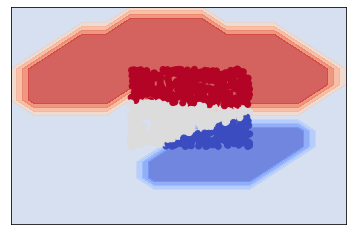

In [29]:
Z = clf_multi.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap=plt.cm.coolwarm)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

## Решение задачи классификации текстов

Возьмем в качестве примера данные новостей `fetch_20newsgroups` из sklearn и рассмотрим категории "атеизм" и "космос".

In [30]:
from sklearn.datasets import fetch_20newsgroups

In [31]:
data = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])

Массив с текстами будет находиться в поле `data.data`, номер класса &ndash; в поле `data.target`. В этой задаче для преобразования текстов будем использовать метод Tf-Idf.

**Задание 1.** Преобразуйте тексты с помощью `TfIdfVectorizer`.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
count_vec = TfidfVectorizer(max_features=30000, sublinear_tf=True, 
                            strip_accents='unicode', analyzer='word', 
                            token_pattern=r'\w{1,}')

In [34]:
comments_vec = count_vec.fit_transform(data.data)
comments_vec 

<1786x28419 sparse matrix of type '<class 'numpy.float64'>'
	with 313811 stored elements in Compressed Sparse Row format>

Реализация SVM находится в классе `sklearn.svm.SVC`. Веса каждого признака у обученного классификатора хранятся в поле `coef_`.

**Задание 2.** С помощью функции `sklearn.model_selection.GridSearchCV` выберите лучший параметр `C` для SVM с линейным ядром (`kernel='linear'`) из множества $[10^{-5}, 10^{-4}, 10^{-3}, ... , 10^{3}, 10^{4}, 10^{5}]$. Кросс-валидацию выполняйте по 5 блокам с параметром `random_state=241` и
для `SVC`, и для `KFold`. Качество оценивайте с помощью метрики `accuracy`.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [36]:
kfold= KFold(n_splits=5, shuffle=True, random_state=241)
kfold.get_n_splits(comments_vec)

5

In [37]:
clf5=svm.SVC(kernel='linear',random_state=241)

In [38]:
par=[{'C':[1e-5,1e-4,1e-3,1e-2,1e-1,1e1,1e2,1e3,1e4,1e5]}]

In [39]:
gscv=GridSearchCV(clf5,par,scoring='accuracy')

In [40]:
gscv.fit(comments_vec,data.target)

GridSearchCV(estimator=SVC(kernel='linear', random_state=241),
             param_grid=[{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 10.0, 100.0,
                                1000.0, 10000.0, 100000.0]}],
             scoring='accuracy')

**Задание 3.** Обучите SVM на всей выборке с лучшим параметром `C`. Найдите 10 слов с наибольшим по модулю весом.

In [41]:
gscv.best_estimator_

SVC(C=10.0, kernel='linear', random_state=241)

In [42]:
clf6= svm.SVC(kernel = 'linear', C = 1e1)

In [43]:
clf6.fit(comments_vec, data.target)

SVC(C=10.0, kernel='linear')

In [44]:
list1 = np.array(count_vec.get_feature_names())
list2 = clf6.coef_.toarray()[0]

In [45]:
list1

array(['0', '00', '000', ..., 'zwarte', 'zwork', 'zyklon'], dtype='<U80')

In [46]:
list2

array([-0.11835011,  0.30584603, -0.02345792, ...,  0.03498513,
        0.07695514,  0.        ])

In [47]:
zipp = list(zip(list1, list2))
res = sorted(zipp, key = lambda x: x[1])

In [48]:
res[-10:]

[('shuttle', 0.7587932356147854),
 ('launch', 0.7705166235978583),
 ('dc', 0.7812051504127667),
 ('orbit', 0.8016862115644711),
 ('access', 0.8085385115206064),
 ('sky', 0.9540165780199089),
 ('nasa', 1.0875235081692591),
 ('moon', 1.1349611112129527),
 ('sci', 1.1469189404821853),
 ('space', 2.6601259164071323)]